In [19]:
import numpy as np
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

In [56]:
fn = pd.read_csv('data.csv')

**This a classification because we are worried about wheather a person prone to a heart attack not numerical data**

In [8]:
fn.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
len(fn)

303

In [11]:
fn.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [15]:
for c in fn.columns:
    print(c)
    print(fn[c].nunique())
    print("")

age
41

sex
2

cp
4

trtbps
49

chol
152

fbs
2

restecg
3

thalachh
91

exng
2

oldpeak
40

slp
3

caa
5

thall
4

output
2



**Categorical: sex, cp, fbs, restecg, exng, slp, thall, output**
**Continuous: age, trtbps, chol, thalachh, oldpeak**

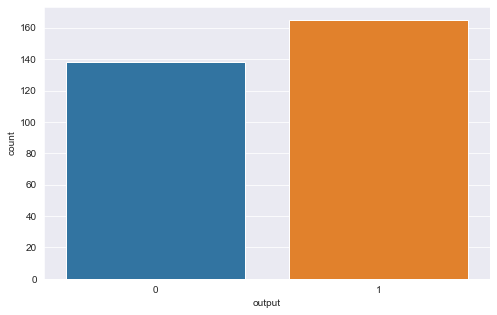

In [18]:
sns.countplot("output", data = fn)

**The dataset appears to be quite balanced since the difference between the two output types is small**
**It is very important to work with a balanced dataset because otherwise our model prediction will be bias towards the majority class**
**There are different stratges you can use: we can downsample the majority class so that the two classes have a similar amount of samples or we can upsample the minority class by artificially creating aditional sample of the minority class or by finding new data set that can help us to increase the number of examples in the minority class.**

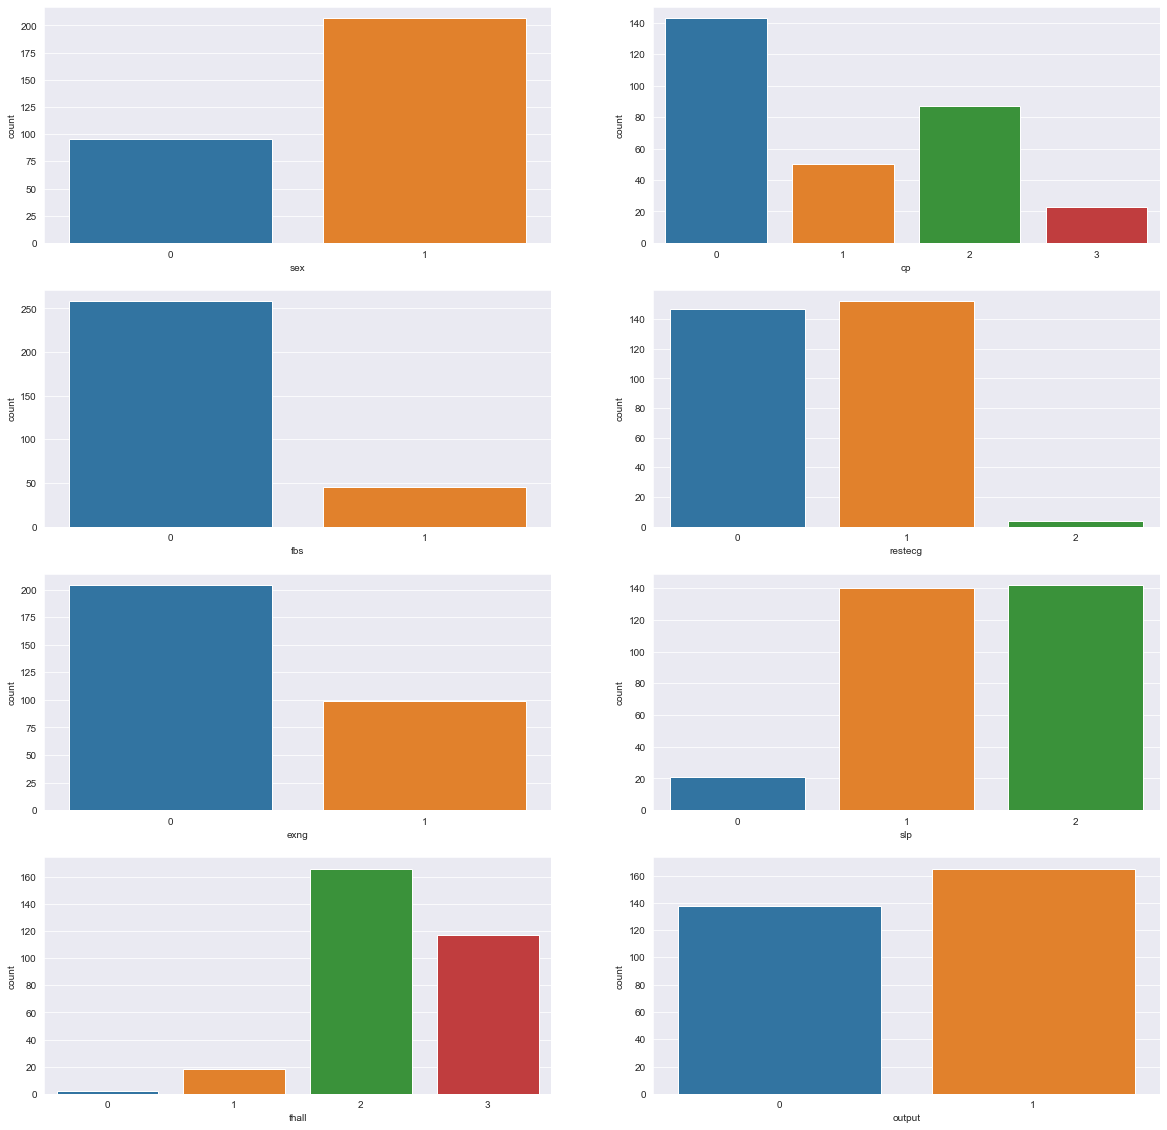

In [66]:
fig,ax = plt.subplots(4,2, figsize = (20,20))
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'thall', 'output']
col = 0
for i in range(4):
    for j in range(2): 
        column = categorical_cols[col]
        sns.countplot(column, data = fn, ax = ax[i,j])
        col += 1
    
    
    

**The majority are male without fasting blood sugar and exercise induced angina. Also the majority of maximum heart rate achieved falls under category 2 and 3. Finally our target variable output displays that the majority of people in the dataset prone to a heart attack.**

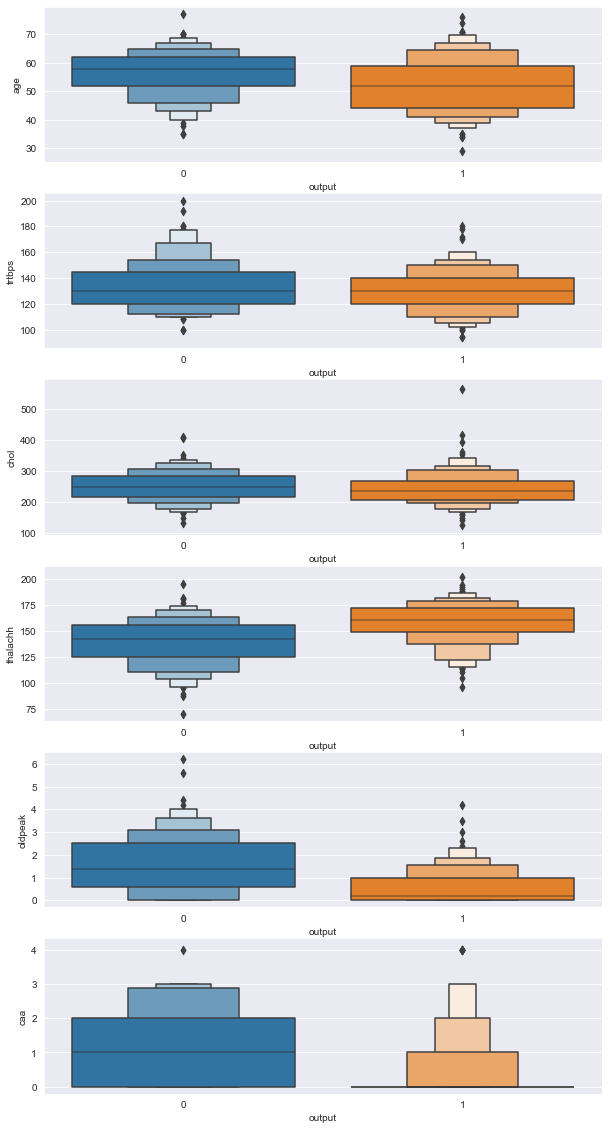

In [69]:
fig,ax = plt.subplots(6,1, figsize = (10,20))
continuous_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa']
col = 0
for i in range(6):
    column = continuous_cols[col]
    sns.boxenplot(x = 'output', y = column, data = fn, ax = ax[i])
    col += 1

**It is apparent that output value 0 has larger medians for age, oldpeak, and caa. Additionally ouput value 1 has larger medians for thalachh and similar medians for chol and trtbps.**

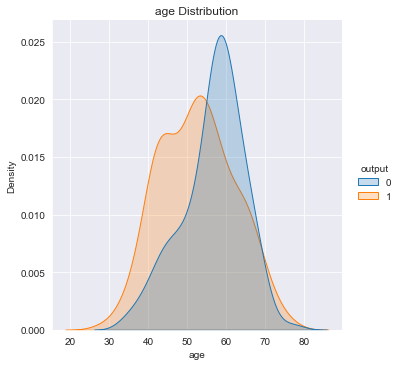

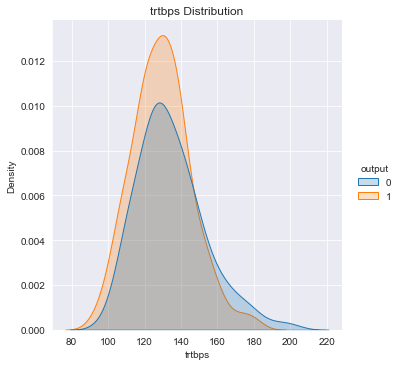

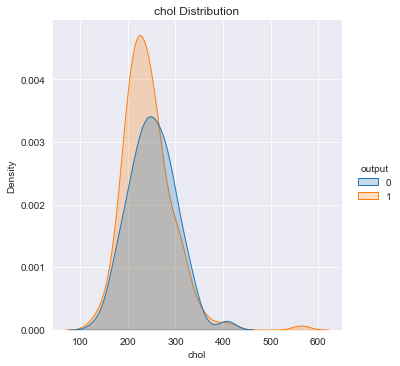

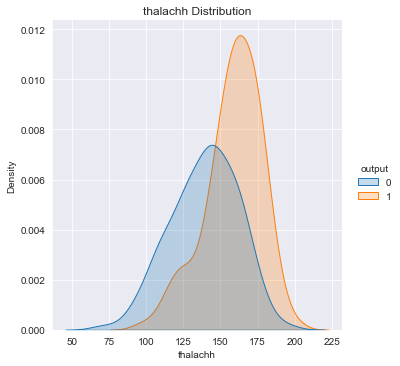

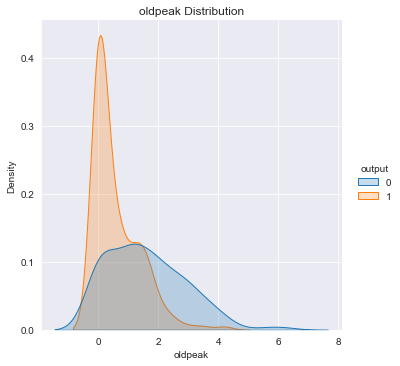

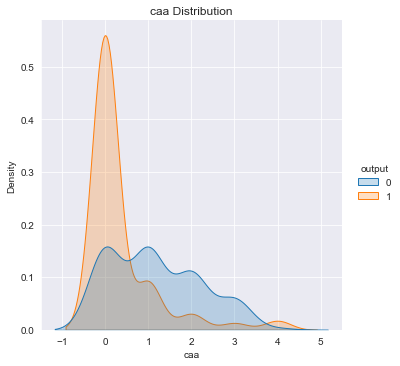

In [71]:

col = 0
for i in range(6):
    column = continuous_cols[col]
    sns.displot(x = column, hue = "output", kind = "kde", fill = True, data = fn).set(title = column + " Distribution")
    col += 1

**The output value 1 has a higher peak in each distribution graph except for age. It is also evident that caa causes output value 0 to have a not normal distribution.**

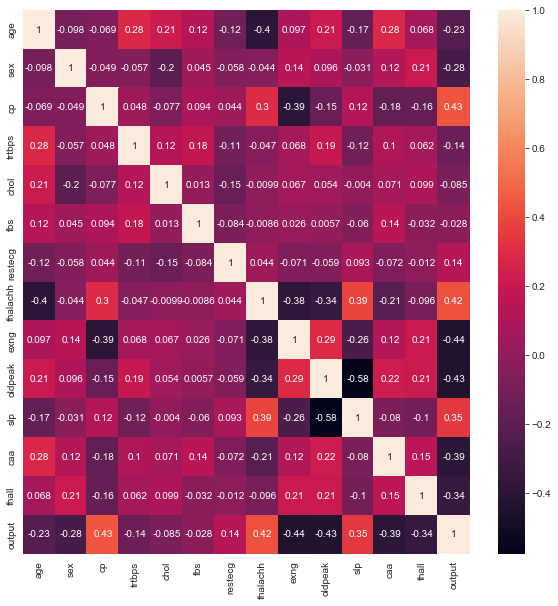

In [72]:
corr = fn.corr()
fig,ax = plt.subplots(1,1, figsize = (10,10))
sns.heatmap(corr, annot = True, ax = ax)

**It is apparent that there are no strong signs of multicollinearity in our data. It is also interesting that cp has the largest correlation with output.**

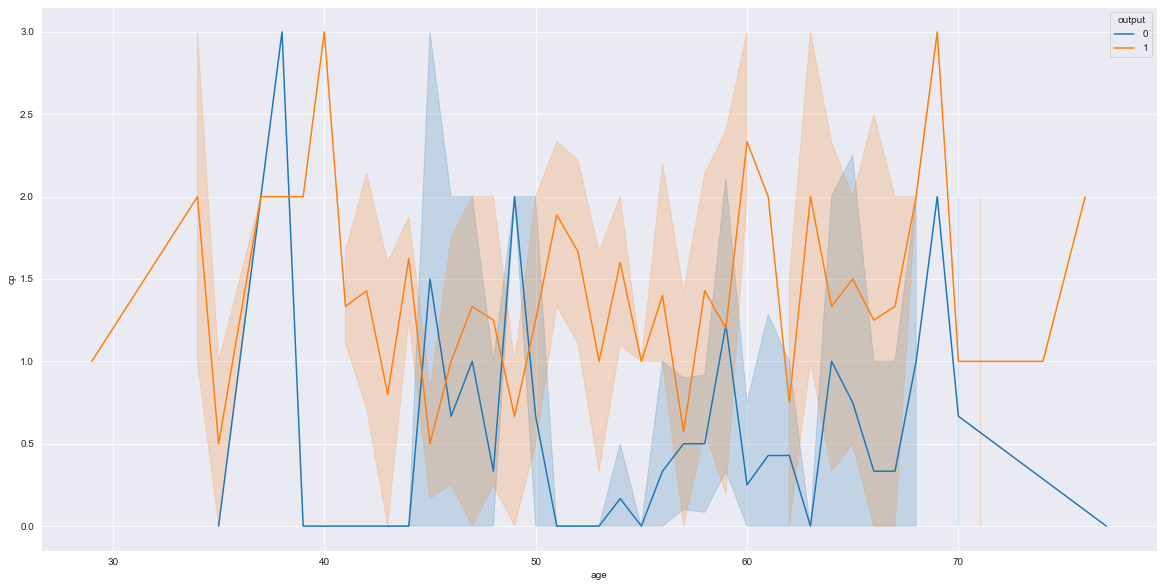

In [73]:
fig,ax = plt.subplots(1,1, figsize = (20,10))
sns.lineplot(x = 'age', y = 'cp', data = fn, ax = ax, hue = 'output')

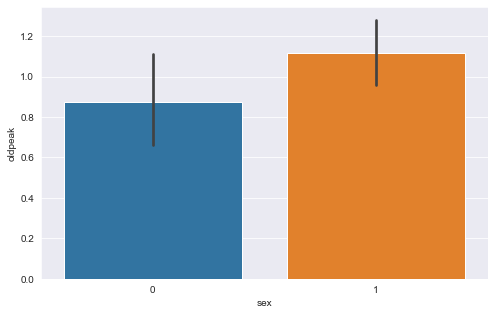

In [74]:
sns.barplot(x=fn['sex'], y=fn['oldpeak'])

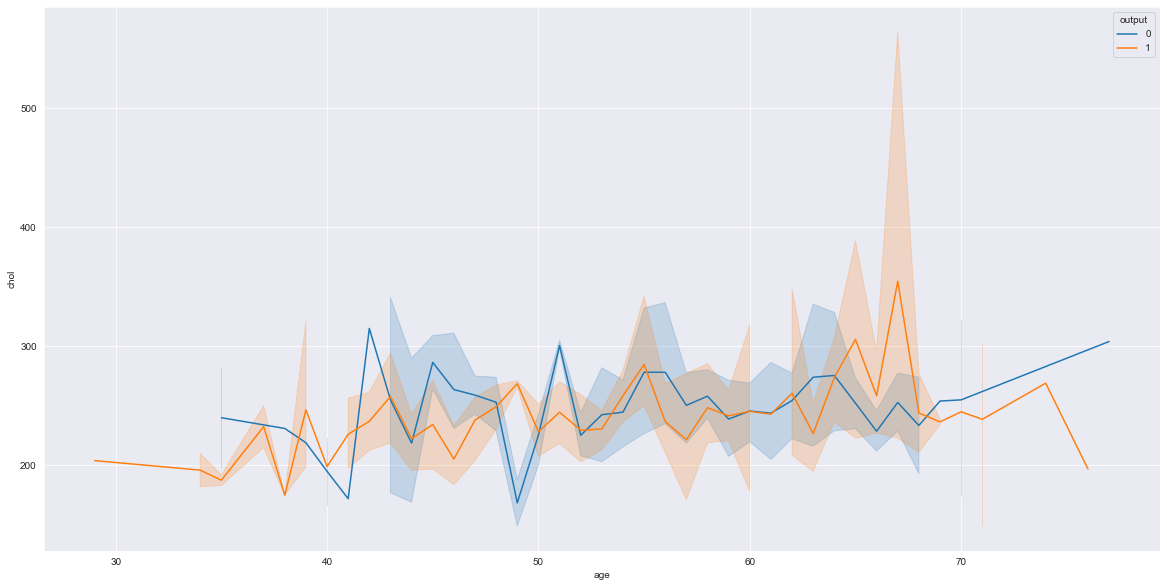

In [50]:
fig,ax = plt.subplots(1,1, figsize = (20,10))
sns.lineplot(x = 'age', y = 'chol', data = fn, ax = ax, hue = 'output')

**It is apparent that people prone to a heart attack tend to have a higher previous peak compared to those that don't. Additionally it is interesting that as age increases cholesterol also slowly increase for both outputs**

In [52]:
from sklearn.model_selection import train_test_split

In [76]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'thall']
X = fn.drop(['output'], axis = 1)
Y = fn['output']
X[categorical_cols] = X[categorical_cols].astype(str)
X = pd.get_dummies(X)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [87]:
scaler = StandardScaler()
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])


In [88]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.8241758241758241


In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        41
           1       0.85      0.82      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



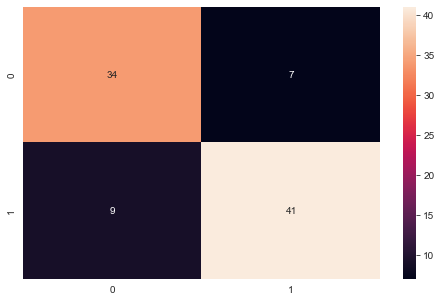

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True)


In [96]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, Y, cv = 5)
print(scores.mean())

0.818360655737705


In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.7912087912087912


In [99]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        41
           1       0.80      0.82      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



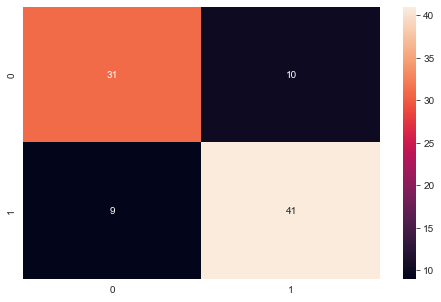

In [100]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True)

In [101]:
scores = cross_val_score(dt, X, Y, cv = 5)
print(scores.mean())

0.7486338797814207


**Within both of the models I scaled the data using the standard scaler because the data may be in different range of values and using the same scale for all the columns may produce a better result. The reason why I picked decision trees and logistic regression are because they both are used to predict a categorical value. Based on the models ran above it is apparent that logistic regression is more accurate due to it's obtained accuracy rate and cross validation scores. I also realized that even though all the variables are not all highly correlated to the output when put together in a model the variables can be highly useful in order to predict the outcome.Finally while exploring the data I realized how important scaling and encoding is in order to create an accurate and usable model.** 